  tourney_id tourney_name surface  draw_size tourney_level  tourney_date  \
0  2023-9900   United Cup    Hard         18             A      20230102   
1  2023-9900   United Cup    Hard         18             A      20230102   
2  2023-9900   United Cup    Hard         18             A      20230102   
3  2023-9900   United Cup    Hard         18             A      20230102   
4  2023-9900   United Cup    Hard         18             A      20230102   

   match_num  winner_id  winner_seed winner_entry  ... l_1stIn l_1stWon  \
0        300     126203          3.0          NaN  ...    62.0     47.0   
1        299     126207          NaN          NaN  ...    12.0      8.0   
2        296     126203          3.0          NaN  ...    62.0     51.0   
3        295     126207          NaN          NaN  ...    41.0     26.0   
4        292     126774          1.0          NaN  ...    58.0     48.0   

   l_2ndWon l_SvGms  l_bpSaved  l_bpFaced  winner_rank winner_rank_points  \
0      15.0    

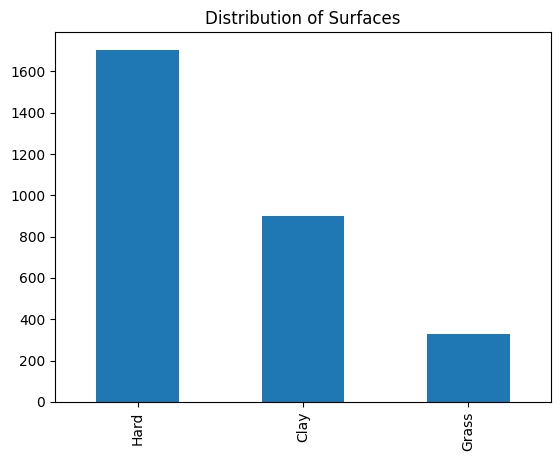

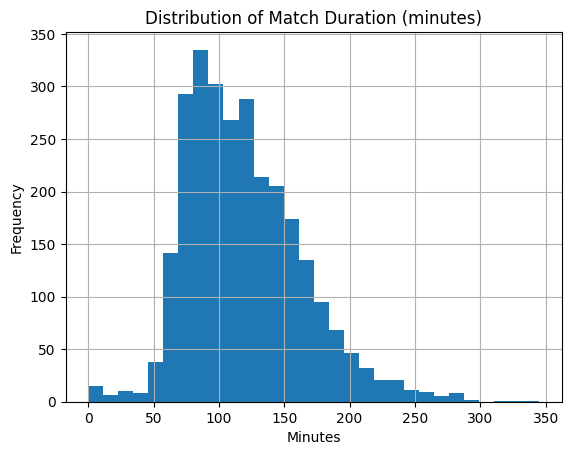

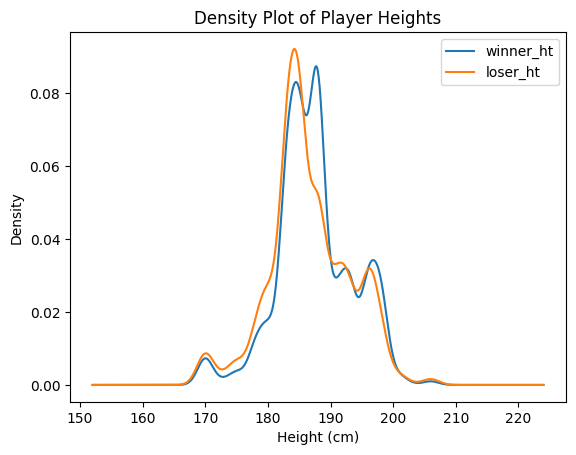

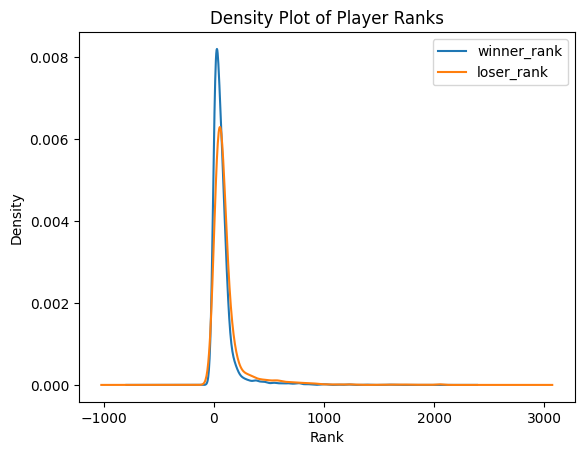

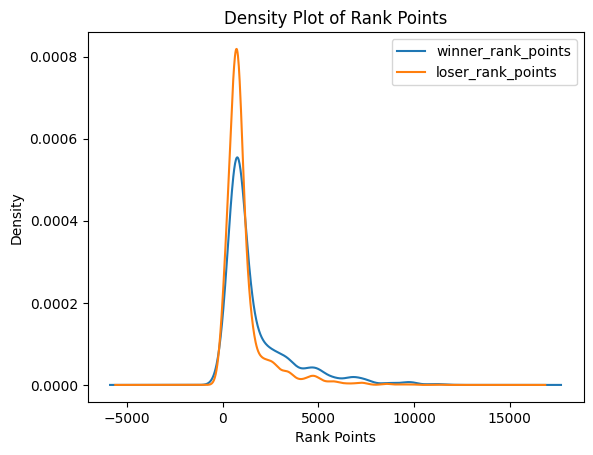

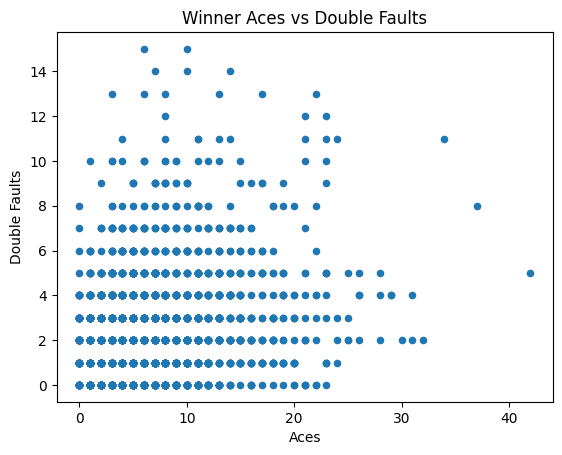

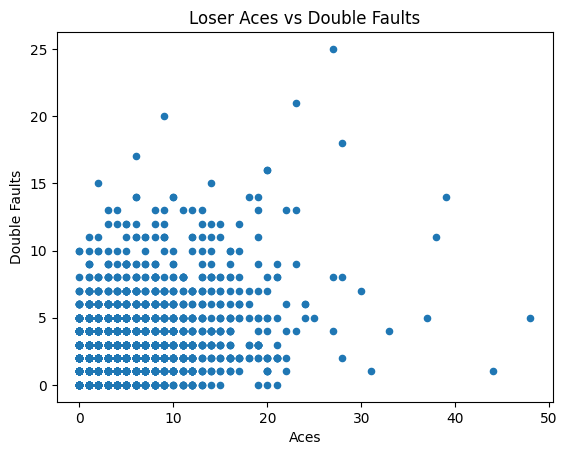

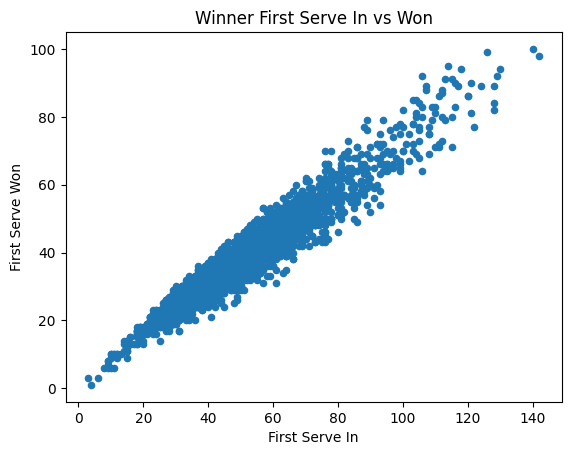

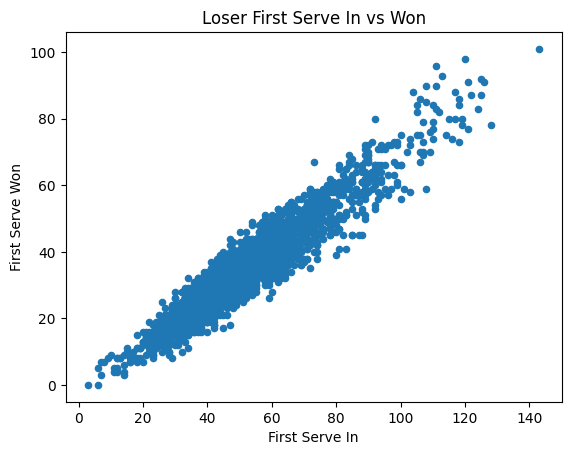

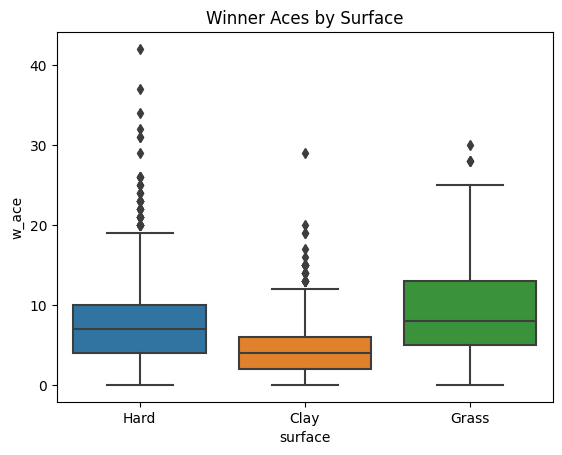

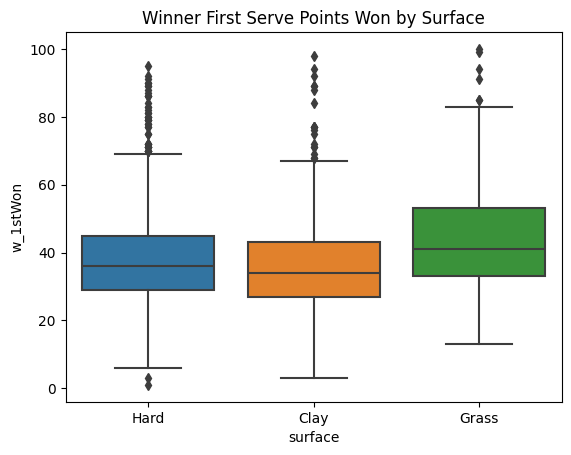

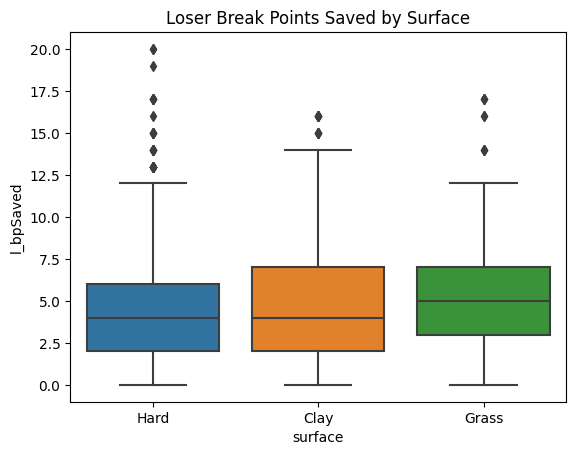

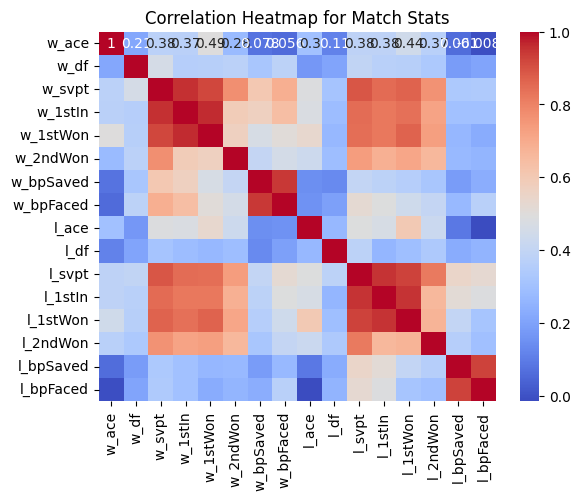

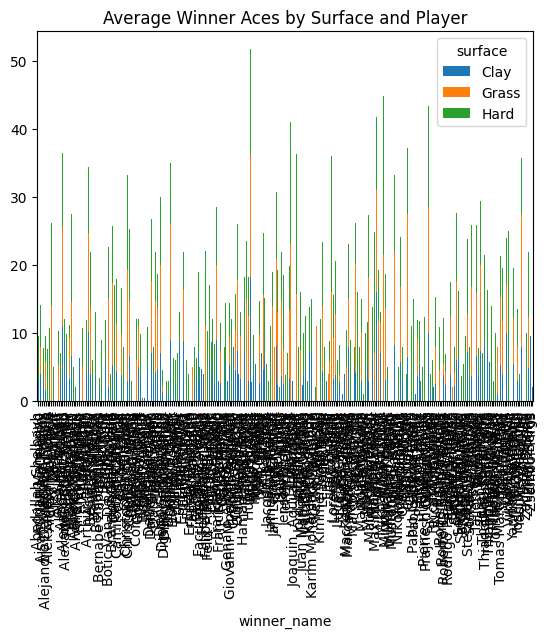

                                 w_ace      w_df    w_1stIn   w_1stWon  \
winner_name                                                              
Abedallah Shelbayh            5.333333  2.333333  38.333333  26.333333   
Adrian Mannarino              5.500000  2.428571  45.476190  33.642857   
Aisam Ul Haq Qureshi               NaN       NaN        NaN        NaN   
Albert Ramos                  3.000000  1.750000  55.333333  37.500000   
Alejandro Davidovich Fokina   3.312500  1.718750  49.031250  35.406250   
...                                ...       ...        ...        ...   
Zachary Svajda               10.000000  0.000000  71.000000  48.000000   
Zhizhen Zhang                 6.842105  1.947368  56.157895  41.842105   
Zizou Bergs                   9.500000  3.000000  64.500000  48.000000   
Zsombor Piros                 2.000000  0.000000  39.000000  30.000000   
Zura Tkemaladze                    NaN       NaN        NaN        NaN   

                              w_2ndWo

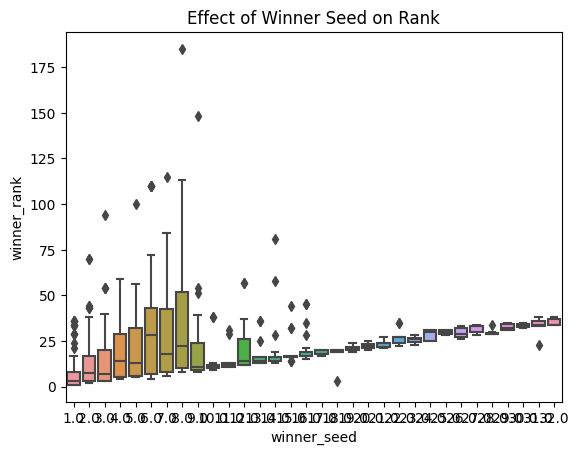

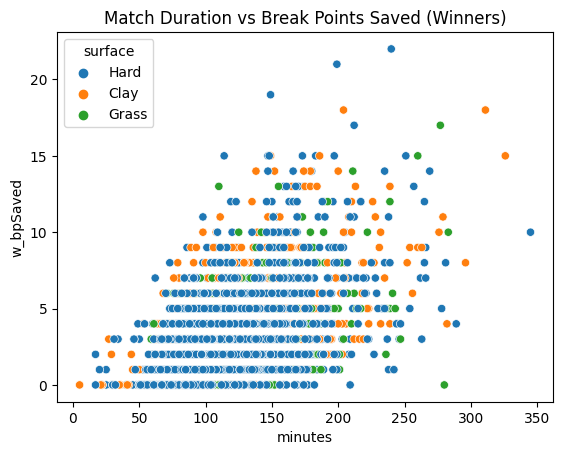

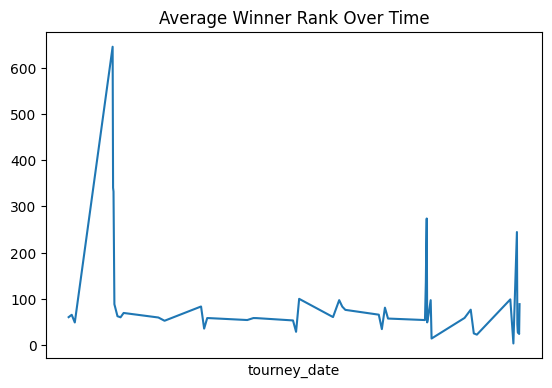

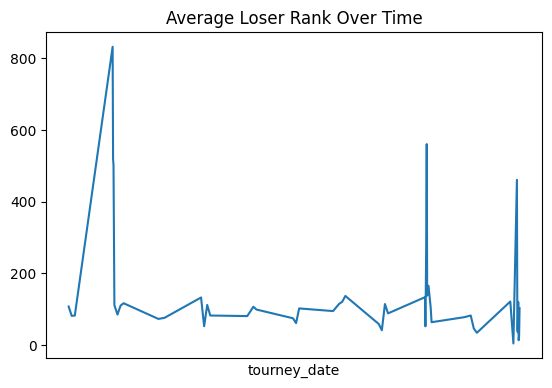

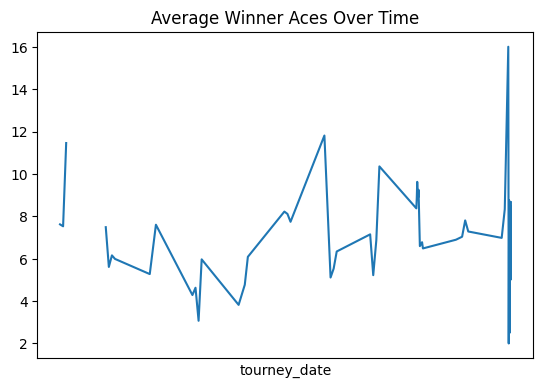

/var/folders/ml/c9m4gk2d5j1gjzt21jgb5d3r0000gn/T/ipykernel_89375/2337604995.py:157: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  top_players.groupby('tourney_date')['w_1stWon'].plot(legend=True)


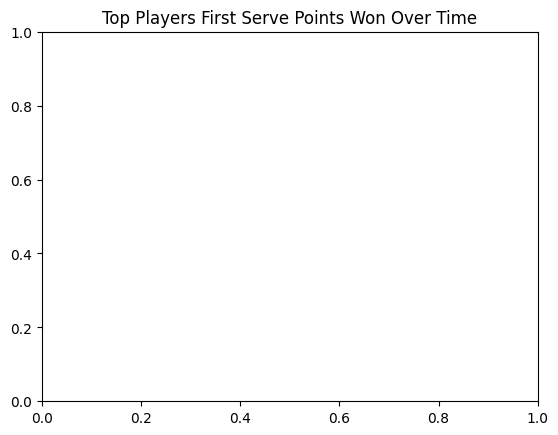

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Data Loading and Overview
# Load the dataset
df = pd.read_csv('../data/csvs/ATP (Mens)/tennis_atp/atp_matches_2023.csv')

# Inspect the data
print(df.head())       # Preview the first few rows
print(df.info())       # Get data types and non-null counts
print(df.describe())   # Summary statistics for numerical columns

# Step 2: Data Cleaning
# Handle missing data
print(df.isnull().sum())   # Count of missing values in each column

# Example: Fill missing numerical values with mean, or drop rows with missing values
df['winner_ht'].fillna(df['winner_ht'].mean(), inplace=True)
df.dropna(subset=['winner_name', 'loser_name'], inplace=True)

# Data Type Correction
df['tourney_date'] = pd.to_datetime(df['tourney_date'])  # Convert to datetime

# Step 3: Univariate Analysis
# Distribution of Key Variables
# Tournament Surface
df['surface'].value_counts().plot(kind='bar')
plt.title('Distribution of Surfaces')
plt.show()

# Match Duration
df['minutes'].hist(bins=30)
plt.title('Distribution of Match Duration (minutes)')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.show()

# Player Heights
df[['winner_ht', 'loser_ht']].plot(kind='density')
plt.title('Density Plot of Player Heights')
plt.xlabel('Height (cm)')
plt.show()

# Rank and Rank Points
# Winner and Loser Ranks
df[['winner_rank', 'loser_rank']].plot(kind='density')
plt.title('Density Plot of Player Ranks')
plt.xlabel('Rank')
plt.show()

# Rank Points Distribution
df[['winner_rank_points', 'loser_rank_points']].plot(kind='density')
plt.title('Density Plot of Rank Points')
plt.xlabel('Rank Points')
plt.show()

# Step 4: Bivariate Analysis
# Match Statistics Comparison
# Aces vs Double Faults
df.plot.scatter(x='w_ace', y='w_df')
plt.title('Winner Aces vs Double Faults')
plt.xlabel('Aces')
plt.ylabel('Double Faults')
plt.show()

df.plot.scatter(x='l_ace', y='l_df')
plt.title('Loser Aces vs Double Faults')
plt.xlabel('Aces')
plt.ylabel('Double Faults')
plt.show()

# First Serve In vs Won
df.plot.scatter(x='w_1stIn', y='w_1stWon')
plt.title('Winner First Serve In vs Won')
plt.xlabel('First Serve In')
plt.ylabel('First Serve Won')
plt.show()

df.plot.scatter(x='l_1stIn', y='l_1stWon')
plt.title('Loser First Serve In vs Won')
plt.xlabel('First Serve In')
plt.ylabel('First Serve Won')
plt.show()

# Performance by Surface
# Winner's Performance
sns.boxplot(x='surface', y='w_ace', data=df)
plt.title('Winner Aces by Surface')
plt.show()

sns.boxplot(x='surface', y='w_1stWon', data=df)
plt.title('Winner First Serve Points Won by Surface')
plt.show()

# Loser's Performance
sns.boxplot(x='surface', y='l_bpSaved', data=df)
plt.title('Loser Break Points Saved by Surface')
plt.show()

# Correlation Analysis
# Heatmap for Match Stats
match_stats = df[['w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_bpSaved', 'w_bpFaced', 
                  'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_bpSaved', 'l_bpFaced']]
sns.heatmap(match_stats.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Match Stats')
plt.show()

# Step 5: Multivariate Analysis
# Performance by Player and Surface
# Compare Winners on Different Surfaces
df.groupby(['winner_name', 'surface'])['w_ace'].mean().unstack().plot(kind='bar', stacked=True)
plt.title('Average Winner Aces by Surface and Player')
plt.show()

# Aggregate Match Stats by Player
player_stats = df.groupby('winner_name').agg({
    'w_ace': 'mean',
    'w_df': 'mean',
    'w_1stIn': 'mean',
    'w_1stWon': 'mean',
    'w_2ndWon': 'mean',
    'winner_rank': 'mean'
})
print(player_stats)

# Match Outcome Influences
# Effect of Seed on Winning
sns.boxplot(x='winner_seed', y='winner_rank', data=df)
plt.title('Effect of Winner Seed on Rank')
plt.show()

# Duration vs Performance
sns.scatterplot(x='minutes', y='w_bpSaved', hue='surface', data=df)
plt.title('Match Duration vs Break Points Saved (Winners)')
plt.show()

# Step 6: Time Series Analysis
# Performance Trends Over Time
# Ranking Over Time
df.groupby('tourney_date')['winner_rank'].mean().plot()
plt.title('Average Winner Rank Over Time')
plt.show()

df.groupby('tourney_date')['loser_rank'].mean().plot()
plt.title('Average Loser Rank Over Time')
plt.show()

# Match Stats Over Time
df.groupby('tourney_date')['w_ace'].mean().plot()
plt.title('Average Winner Aces Over Time')
plt.show()

# Player Performance Over Time
# Top Players’ Form
top_players = df[df['winner_name'].isin(['Player 1', 'Player 2'])]  # Replace with actual player names
top_players.groupby('tourney_date')['w_1stWon'].plot(legend=True)
plt.title('Top Players First Serve Points Won Over Time')
plt.show()

# Step 7: Reporting and Visualization
# Summary Reports
# Create summary statistics, visualizations, and insights from the analyses above.

# Dashboards (Optional)
# Use tools like Tableau or PowerBI for an interactive presentation of the data, where stakeholders can explore the visualizations.
